<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana1/Notebooks/Distribuci%C3%B3n_conjunta_de_palabras_en_los_bigramas_de_un_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas





In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import re # módulo operaciones expresiones regulares

import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Funciones

In [2]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "")
  return texto

In [3]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista,
  por ejemplo:   autor, titulo y otros elementos'''

  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [4]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas
  texto = texto.lower()

  #Quitar tildes

  a,b = 'áéíóúü','aeiouu'
  trans = str.maketrans( a,b)
  texto = texto.translate(trans)


  #Quitar puntuación y números
  texto = re.sub('[^ña-z]+', ' ', texto)

  return texto

In [5]:
def probabilidad_conjunta_en_bigramas(palabra1, palabra2, texto):

    bigramas_df = pd.DataFrame(nltk.bigrams(texto.split()), columns=['p1', 'p2'])

    # One Hot Encoding para las dos palabras que nos interesan
    bigramas_df[palabra1]=np.where((bigramas_df['p1']==palabra1) | (bigramas_df['p2']==palabra1),1,0)
    bigramas_df[palabra2]=np.where((bigramas_df['p1']==palabra2) | (bigramas_df['p2']==palabra2),1,0)

    # Calcular la probabilidad de ocurrencia en los bigramas
    P_conjunta = pd.crosstab(index=bigramas_df[palabra1], columns=bigramas_df[palabra2])/len(bigramas_df)

    # Gráficar distribución de probabilidad conjunta
    xs, ys = np.meshgrid(np.arange(2), np.arange(2))

    x_data = xs.flatten()
    y_data = ys.flatten()
    z_data = P_conjunta.values.flatten()

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.bar3d(x = x_data, y = y_data, z = np.zeros(4),
            dx = .3,   # ancho
            dy = .3 ,  # profunco
            dz = z_data,
            color ='c') #alto
    ax.set_zlim3d(0, .05)

    ax.set_xlabel(palabra2)
    ax.set_ylabel(palabra1)
    ax.set_zlabel('probabilidad')

    plt.show()
    return P_conjunta

## Leer y prepocesar texto

In [8]:
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
borrar = ['Gabriel García Márquez',
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']
libro =  borrar_elementos(libro, borrar)
libro_limpio = limpiar_texto(libro)
libro_limpio

' muchos años despues frente al peloton de fusilamiento el coronel aureliano buendia habia de recordar aquella tarde remota en que su padre lo llevo a conocer el hielo macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un rio de aguas diafanas que se precipitaban por un lecho de piedras pulidas blancas y enormes como huevos prehistoricos el mundo era tan reciente que muchas cosas carecian de nombre y para mencionarlas habia que señalarias con el dedo todos los años por el mes de marzo una familia de gitanos desarrapados plantaba su carpa cerca de la aldea y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos primero llevaron el iman un gitano corpulento de barba montaraz y manos de gorrion que se presento con el nombre de melquiades hizo una truculenta demostracion publica de lo que el mismo llamaba la octava maravilla de los sabios alquimistas de macedonia fue de casa en casa arrastrando dos lingotes metalicos y to

## Distribución de probabilidad conjunta

In [9]:

bigramas_df = pd.DataFrame(nltk.bigrams(libro_limpio.split()), columns=['p1', 'p2'])

palabra1 ='aureliano'
palabra2 = 'buendia'

# One Hot Encoding para las dos palabras que nos interesan
bigramas_df[palabra1]=np.where((bigramas_df['p1']==palabra1) | (bigramas_df['p2']==palabra1),1,0)
bigramas_df[palabra2]=np.where((bigramas_df['p1']==palabra2) | (bigramas_df['p2']==palabra2),1,0)

bigramas_df

,p1,p2,aureliano,buendia
0,muchos,años,0,0
1,años,despues,0,0
2,despues,frente,0,0
3,frente,al,0,0
4,al,peloton,0,0
...,...,...,...,...
137903,una,segunda,0,0
137904,segunda,oportunidad,0,0
137905,oportunidad,sobre,0,0
137906,sobre,la,0,0


In [14]:
def espacio_probabilidad_bernoulli(palabra):
    p = bigramas_df[palabra].mean()
    W = [0,1]
    P = [1-p , p]
    sns.barplot(x= W, y = P).set(title ='P({}) = {}'.format(palabra,p))
    plt.show()


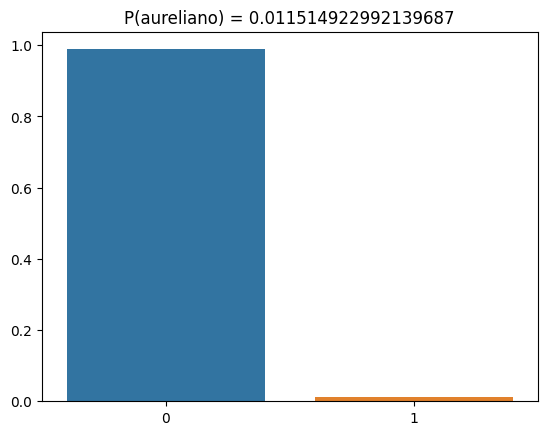

In [17]:
espacio_probabilidad_bernoulli('aureliano')

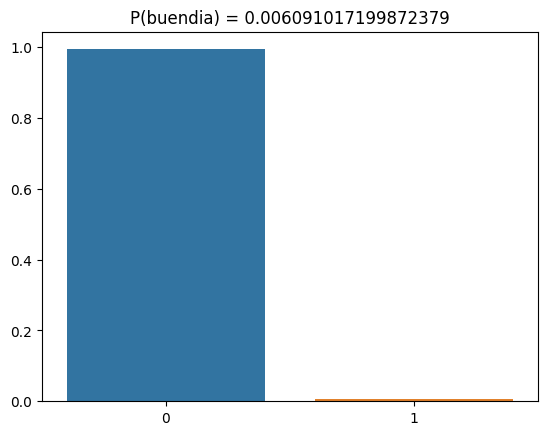

In [18]:
espacio_probabilidad_bernoulli('buendia')

In [26]:
# Calcular la probabilidad de ocurrencia en los bigramas
P_conjunta = pd.crosstab(index=bigramas_df.aureliano, columns=bigramas_df.buendia)/len(bigramas_df)
P_conjunta

buendia,0,1
aureliano,,
0,0.983902,0.004583
1,0.010007,0.001508


In [23]:
bigramas_df[bigramas_df.aureliano==1]

,p1,p2,aureliano,buendia
9,coronel,aureliano,1,0
10,aureliano,buendia,1,1
1768,fantasticos,aureliano,1,0
1769,aureliano,que,1,0
3120,primer,aureliano,1,0
...,...,...,...,...
137607,aureliano,lo,1,0
137751,cuando,aureliano,1,0
137752,aureliano,salto,1,0
137870,que,aureliano,1,0


In [ ]:
# Vamos a graficar la P_conjunta en el eje de las z,
# Pero necesitamos primero los planos x y y

xs, ys = np.meshgrid(P_conjunta.columns, P_conjunta.index)

x_data = xs.flatten()
y_data = ys.flatten()
z_data = P_conjunta.values.flatten()

x_data, y_data, z_data

(array([0, 1, 0, 1]),
 array([0, 0, 1, 1]),
 array([0.98390231, 0.00458277, 0.01000667, 0.00150825]))

In [ ]:
xs

array([[0, 1],
       [0, 1]])

In [ ]:
ys

array([[0, 0],
       [1, 1]])

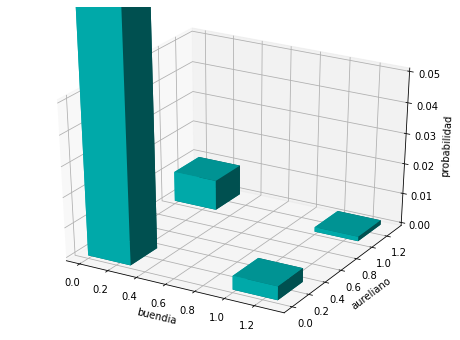

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x = x_data, y = y_data, z = np.zeros(4),
         dx = .3,   # ancho
         dy = .3 ,  # profundo
         dz = z_data, #altura
         color ='c') #alto

ax.set_zlim3d(0, .05)
ax.set_xlabel(palabra2)
ax.set_ylabel(palabra1)
ax.set_zlabel('probabilidad')

plt.show()

# Todo junto

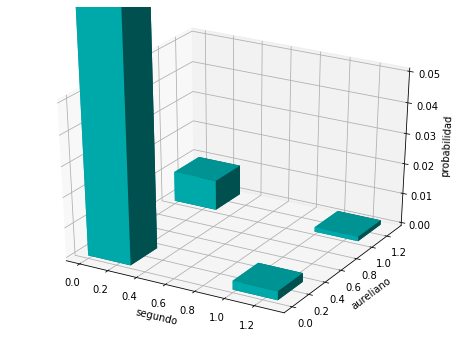

segundo,0,1
aureliano,,
0,0.985534,0.002951
1,0.009999,0.001516


In [ ]:
probabilidad_conjunta_en_bigramas('aureliano', 'segundo', libro_limpio)

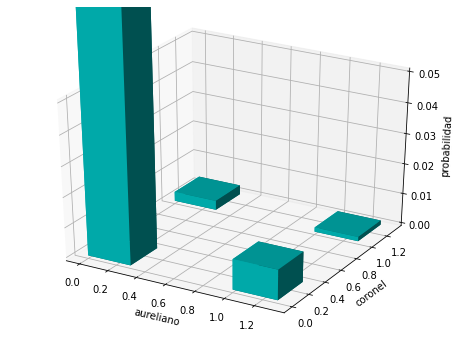

aureliano,0,1
coronel,,
0,0.985396,0.010079
1,0.003089,0.001436


In [ ]:
probabilidad_conjunta_en_bigramas('coronel', 'aureliano', libro_limpio)